# 1. Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import random as rd
# OBS you can also implement your own Poisson pdf
# but for high lambdas there are issues because of the large numbers
from scipy.stats import poisson

# 2. ERDOS-RENYI NETWORKS

## 2.a. Tests

In [2]:
def ER_graph(N=1000,p=.5):
    # generate an Erdos-Renyi graph
    # N : vertices in the returned graph
    # p : probability of connection
    
    adj = np.zeros((N,N));
    # set elements to 1 with probability p
    adj[np.random.uniform(size=(N,N))<p]=1;
    # symmetrize
    adj = np.triu(adj)+np.transpose(np.triu(adj));
    # remove diagonal elements
    adj[range(0,N),range(0,N)] = 0;
    
    return nx.from_numpy_matrix(adj);

In [3]:
# On génère le graphe
N = 60; p = 0.06;
G_ER = ER_graph(N,p)

36


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

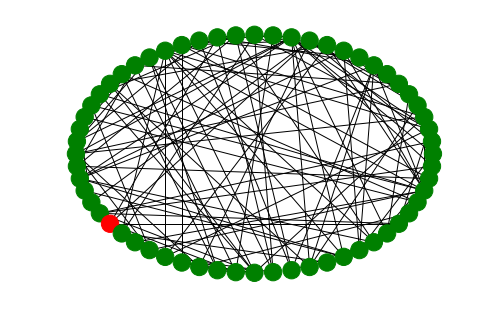

In [4]:
color_map = []
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
print (malade0)
for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    color_map.append('green') # du coup ils sont tous verts
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
color_map[malade0]='red' # sa couleur est donc rouge

nx.draw_circular(G_ER,node_color = color_map)
plt.show()

In [5]:
malades = []
malades.append(malade0)
for i in malades :
    voisins = G_ER.neighbors(i)
    print(voisins)
    for j in voisins:
        G_ER.node[j]['etat'] = 'malade'
        print(j)
print(len(voisins))
list(G_ER.nodes(data=True))
G_ER.edges(malade0)

[12, 17, 44, 54]
12
17
44
54
4


[(36, 12), (36, 17), (36, 44), (36, 54)]

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

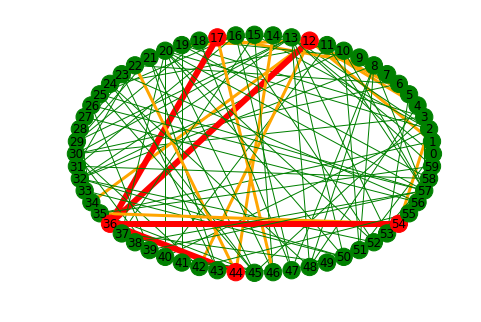

In [6]:
for i in range(N):
    if G_ER.node[i]['etat'] == 'malade':
        color_map[i] = 'red'
    else :
        color_map[i]='green'
        
for edge in range(len(G_ER.edges())):
    arrete = G_ER[G_ER.edges()[edge][0]][G_ER.edges()[edge][1]]
    arrete['color']='green' # toutes les arretes en jaune
    arrete['weight']=1
    if G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' :
        arrete['color']='red'# arrete rouge si les deux personnes sont malades
        arrete['weight']=6
    elif ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'sain' ) or ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'sain' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' ) :
        arrete['color']='orange' # les contaminations possibles en orange
        arrete['weight']=3


edges = G_ER.edges()
color_edges = [G_ER[u][v]['color'] for u,v in edges] #on recupere la liste des couleurs
weights = [G_ER[u][v]['weight'] for u,v in edges]

nx.draw_circular(G_ER,node_color = color_map,edge_color=color_edges, width = weights, with_labels = True)
plt.show()

## 2.b. Simulation

In [7]:
def ER_graph(N=1000,p=.5):
    # generate an Erdos-Renyi graph
    # N : vertices in the returned graph
    # p : probability of connection
    
    adj = np.zeros((N,N));
    # set elements to 1 with probability p
    adj[np.random.uniform(size=(N,N))<p]=1;
    # symmetrize
    adj = np.triu(adj)+np.transpose(np.triu(adj));
    # remove diagonal elements
    adj[range(0,N),range(0,N)] = 0;
    
    return nx.from_numpy_matrix(adj);

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

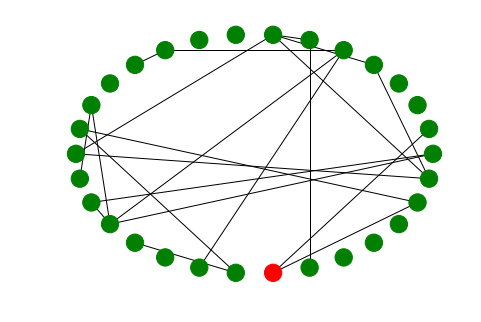

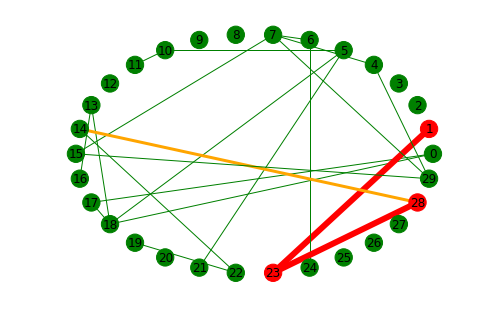

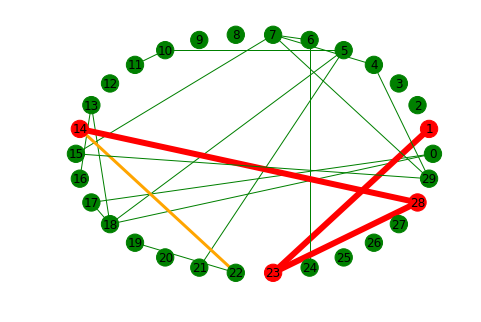

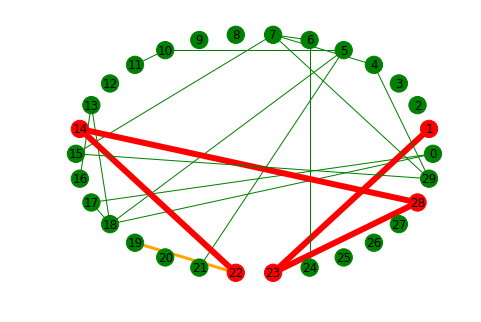

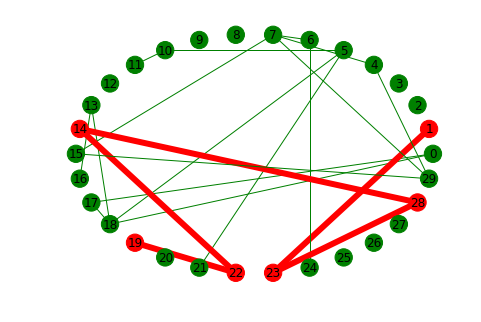

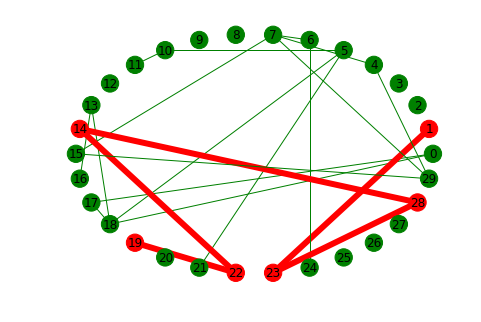

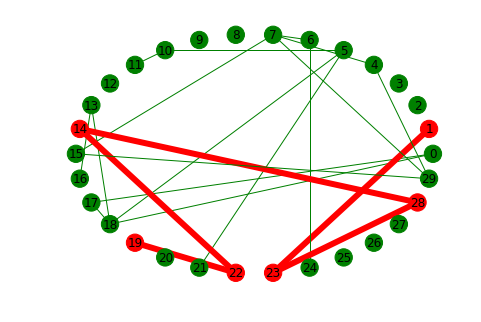

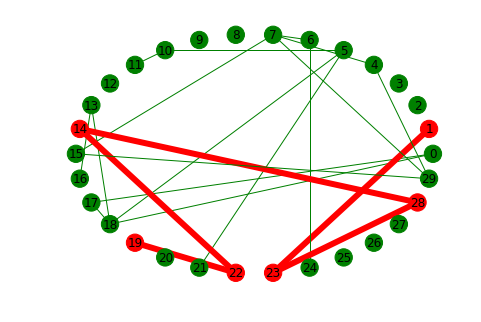

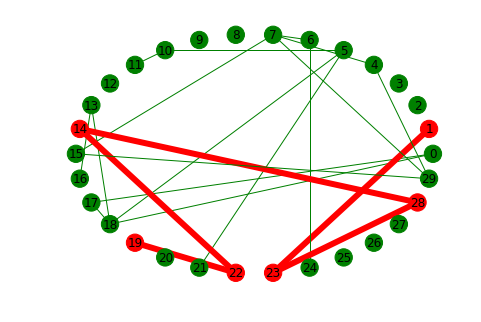

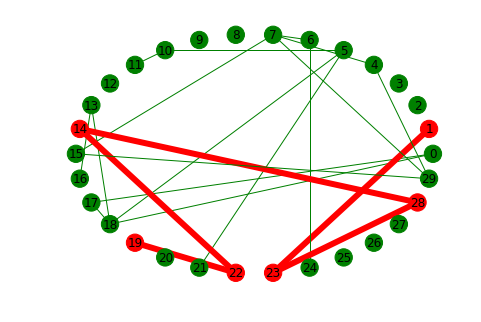

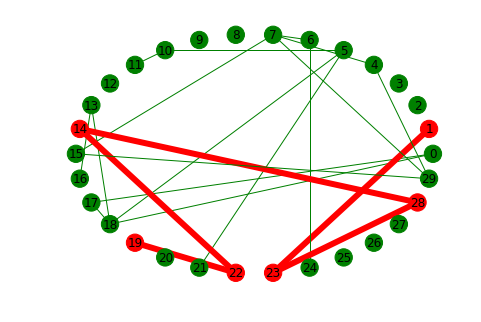

In [8]:
N = 30; p = 0.04;
G_ER = ER_graph(N,p)
color_map = []
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
malades = [malade0]

for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    color_map.append('green') # du coup ils sont tous verts
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
color_map[malade0]='red' # sa couleur est donc rouge

nx.draw_circular(G_ER,node_color = color_map)
plt.show()

nombre_iterations = 10

# proba = 0.3 # C'est la proba que avec un lien, l'autre soit malade

for i in range (nombre_iterations):
    # définir les voisins des malades
    futur_malades = [] 
    for malade in malades :
        voisins = G_ER.neighbors(malade) # on récupère les voisins 
        for voisin in voisins:
            rand = rd.random()
            if G_ER.node[voisin]['etat'] == 'sain' : #and rand < proba :
                G_ER.node[voisin]['etat'] = 'malade' # ils deviennent malades
                futur_malades.append(voisin)
    for personne in futur_malades :
        malades.append(personne) 
            
    # colorer les malades
    for personne in range(N):
        if G_ER.node[personne]['etat'] == 'malade':
            color_map[personne] = 'red'
        else :
            color_map[personne]='green'
    
    #colorer les arretes      
    for edge in range(len(G_ER.edges())):
        arrete = G_ER[G_ER.edges()[edge][0]][G_ER.edges()[edge][1]]
        arrete['color']='green' # toutes les arretes en jaune
        arrete['weight']=1
        if G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' :
            arrete['color']='red'# arrete rouge si les deux personnes sont malades
            arrete['weight']=6
        elif ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'malade' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'sain' ) or ( G_ER.node[G_ER.edges()[edge][0]]['etat'] == 'sain' and G_ER.node[G_ER.edges()[edge][1]]['etat'] == 'malade' ) :
            arrete['color']='orange' # les contaminations possibles en orange
            arrete['weight']=3

    edges = G_ER.edges()
    color_edges = [G_ER[u][v]['color'] for u,v in edges] #on recupere la liste des couleurs
    weights = [G_ER[u][v]['weight'] for u,v in edges]

    #dessiner les networks
    nx.draw_circular(G_ER,node_color = color_map,edge_color=color_edges, width = weights, with_labels = True)
    plt.show()
        
    

## 2.c. Seuil épidémique

[]
[0.01, 0.01, 0.02, 0.01, 0.01, 0.07, 0.04, 0.02, 0.01, 0.02, 0.16, 0.19, 0.01, 0.01, 0.66, 0.01, 0.35, 0.74, 0.01, 0.84, 0.82, 0.01, 0.89, 0.87, 0.96, 0.91, 0.94, 0.92, 0.96, 0.92, 0.96, 0.01, 1.0, 0.97, 0.96, 0.99, 0.96, 0.97, 0.01, 0.93, 1.0, 0.99, 0.97, 0.97, 0.98, 0.99, 0.99, 0.99, 1.0, 1.0, 1.0, 0.98, 1.0, 0.98, 0.99, 1.0, 1.0, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 1.0, 0.99, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


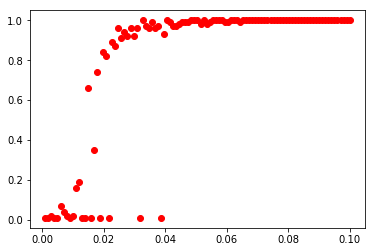

In [9]:
nb_repetitions = 100 # nombre de répétitions de l'expérience
proba_propagation_min = 0.001 # de 0.1%
proba_propagation_max = 0.1 # à 10%
nombre_points = 100
N = 100 # Nombre de personnes 

G_ER = ER_graph(N,p)
malade0 = rd.randint(0,N) # une personne au hasard sera malade au début
malades = [malade0]

for i in range (N):
    G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'

nombre_iterations = 10

proba_lien = []
for i in range (nombre_points+1) :
    proba_lien.append(proba_propagation_min + (proba_propagation_max - proba_propagation_min)*(i/nombre_points))
proba_conta = []

indices_a_supprimer = []

for j in range(len(proba_lien)) :
    p = proba_lien[j]
    G_ER = ER_graph(N,p)
    malade0 = 1 #rd.randint(0,N-1) # une personne au hasard sera malade au début
    malades = [malade0]
    
    for i in range (N):
        G_ER.node[i]['etat']='sain' # on définit l'état sain de tout le monde
    G_ER.node[malade0]['etat']='malade' # le malade 0 a l'état 'malade'
    
    for i in range (nombre_iterations):
        # définir les voisins des malades
        futur_malades = [] 
        for malade in malades :
            voisins = G_ER.neighbors(malade) # on récupère les voisins 
            for voisin in voisins:
                rand = rd.random()
                if G_ER.node[voisin]['etat'] == 'sain' : #and rand < proba :
                    G_ER.node[voisin]['etat'] = 'malade' # ils deviennent malades
                    futur_malades.append(voisin)
        for personne in futur_malades :
            malades.append(personne) 
    
    nombre_malades = 0
    for i in range(N):
        if G_ER.node[i]['etat'] == 'malade' :
            nombre_malades += 1
    
    
#    if nombre_malades == 1 :
#        indices_a_supprimer.append(j)
#    else :
    proba_conta.append(nombre_malades/N)
    
for indice in indices_a_supprimer :
    del proba_lien[indice]

print(indices_a_supprimer)
print (proba_conta)

plt.plot(proba_lien,proba_conta,'ro')
plt.show()







# 3. SMALL-WORLD NETWORKS

In [10]:
def regular_graph(N=100,k=20):
    # generate a regular ring lattice
    # N : vertices in the returned graph
    # k : degree
    
    adj = np.zeros((N,N)); k+=1;
    for i in range(0,N):
        # select the neighs considering periodicity
        neighs = np.mod(np.arange(0,k)-int(k/2)+i,N);
        adj[i,neighs] = 1; adj[i,i]=0;
    return nx.from_numpy_matrix(adj);

def SW_graph(N=100,k=15,p=.1):
    # generate a small world graph
    # N : # vertices in the returned graph
    # k : degree in the initial regular graph
    # p : probability of modify an edge
    
    # generate a regular graph,
    # save the list of edges that are present and missing 
    G_regular = regular_graph(N,k)
    edges = list(G_regular.edges());
    missing_edges = []
    for i in range(0,N):
        for j in range(i+1,N):
            if (i,j) not in edges:
                missing_edges += [(i,j)]

    adj = np.zeros((N,N))
    tosses = np.random.uniform(size=len(edges));
    for edge_idx in range(0,len(edges)):
        # modify and existing edge with probability p
        if tosses[edge_idx]<p:
            # sample the new edge from the missing ones
            new_edge_idx = np.random.randint(len(missing_edges));
            new_edge = missing_edges[new_edge_idx];
            missing_edges[new_edge_idx] = edges[edge_idx];
            edges[edge_idx] = new_edge;
            adj[new_edge]=1;
        else:
            adj[edges[edge_idx]]=1;
    adj = adj+np.transpose(adj);

    return nx.from_numpy_matrix(adj);


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

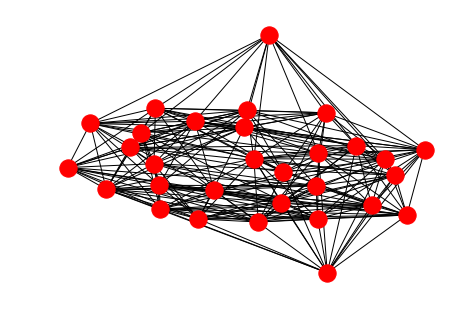

In [11]:
N = 30; k = 15; p = .1;
G_SW = SW_graph(N,k,p)
nx.draw_spring(G_SW)
plt.show()

C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

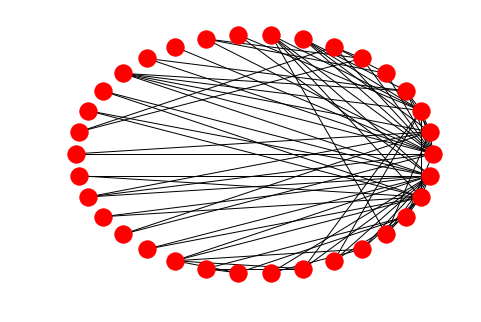

In [12]:
graph = nx.karate_club_graph()
nx.draw_circular(graph)
plt.show()

# World Map

In [33]:
import networkx as nx
import random 
from math import sqrt
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [34]:
themeColors = {"alive": "blue", "infected": "orange", "dead": "red", "recovered": "green"}
drawgif = 1;

In [53]:
class Person:
    idct = 1;
    def __init__(self, world):
        #When infected, first check if disease is already in diseases, if not, check resistances
        self.infections = {}
        self.id = Person.idct;
        Person.idct+=1;
        self.resistances = {}
        self.world = world;
        self.alive = 1;
        self.color = themeColors["alive"]
        self.recoveryRate = random.uniform(.9, .99)
        self.resistance = .9
        #self.resistanceCoeff = random.uniform(.5, 1)*(self.age-40)^2*(1/1600)
    def infect(self, disease, wasResistant):
        baseDeathTime = 32;
        self.infections[disease.id] = Infection(self, disease, baseDeathTime*disease.pathogenicity, self.recoveryRate);
        disease.infected+=1;
        if wasResistant:
            disease.resistant-=1;
        else:
            disease.susceptible-=1;
        self.color = themeColors["infected"]
    def recover(self, infection):
        try:
            self.infections[infection.disease.id] = 0
            infection.disease.infected-=1;
            infection.disease.resistant+=1;
        except:
            print("Infection not on list. Is this vaccination?");
        self.color = themeColors["recovered"]
        self.resistances[infection.disease.id] = self.resistance
    def checkDisease(a, b):
        newInfections = []
        for diseaseid, infection in a.infections.items():
            if b.infections.get(diseaseid, 0)==0 and infection!=0:
                resistance = b.resistances.get(diseaseid, -1);
                if resistance!=-1:
                    test = random.uniform(0, 1)
                    if(test>resistance):
                        b.infect(infection.disease, 1);
                        newInfections.append(infection.disease.id)
                    #else:
                        #print("individual resisted infection!")
                else:
                    b.infect(infection.disease, 0);
                    newInfections.append(infection.disease.id)
        return newInfections
    def interact(self, otherActor):
        if(self.alive==1 and otherActor.alive==1):
            a = Person.checkDisease(self, otherActor);
            b = Person.checkDisease(otherActor, self);
            '''if(len(a)>0):
                print("Infections from A to B:", a)
            if(len(b)>0):
                print("Infections from B to A:", b)'''
    def die(self, disease):
        if(self.alive==1):
            self.alive = 0;
            disease.infected-=1;
            disease.dead+=1;
            self.color = themeColors["dead"]
    def tick(self):
        if(self.alive==1):
            for diseaseid, infection in self.infections.items():
                if(infection!=0):
                    infection.tick()

In [36]:
class Infection:
    def __init__(self, host, disease, timeToDeath, recoveryRate):
        self.host = host;
        self.disease = disease;
        self.timeToDeath = timeToDeath;
        self.recoveryRate = recoveryRate;
        self.id = disease.id;
        self.recovered = 0;
    def tick(self):
        if not self.recovered:
            self.timeToDeath-=1;
            if self.timeToDeath<1:
                self.host.die(self.disease)
            else:
                test = random.uniform(0, 1)
                if(test>self.recoveryRate):
                    self.host.recover(self)
                    self.recovered = 1;

In [37]:
class Disease:
    idct = 1;
    def __init__(self, name, world, virulence, pathogenicity):
        self.name = name;
        self.id = Disease.idct;
        Disease.idct+=1;
        self.virulence = virulence; #Determines how likely the pathogen is to spread from one host to the next
        self.pathogenicity = pathogenicity; #Determines how much disease the pathogen creates in the host (aka number of days w/o recovery until death)
        self.susceptible = world.popsize;
        self.infected = 0;
        self.resistant = 0;
        self.dead = 0;
        self.world = world;
        self.historyS = {};
        self.historyI = {};
        self.historyR = {}
        self.historyD = {}
        world.diseaseList.append(self);
    #These two functions are not currently in use. They don't fit into the current model
    '''def mutateVirulence(self, virulenceJitter = .05):
        self.virulence = self.virulence + random.uniform(-virulenceJitter, virulenceJitter)
    def mutatePathogenicity(self, pathoJitter = .1):
        self.pathogenicity = self.pathogenicity + random.uniform(-pathoJitter, pathoJitter)'''
    def tick(self, age):
        self.historyS[age] = self.susceptible;
        self.historyI[age] = self.infected;
        self.historyR[age] = self.resistant;
        self.historyD[age] = self.dead;
    def summary(self):
        historyFrame = pd.DataFrame({"1-S": self.historyS, "2-I": self.historyI, "3-R": self.historyR, "4-D": self.historyD});
        historyFrame["time"] = historyFrame.index
        return historyFrame;

In [86]:
class World:
    def __init__(self, initPopulation):
        self.popsize = initPopulation;
        self.population = []
        self.diseaseList = [];
        self.age = 0;
        for indv in range(initPopulation):
            self.population.append(Person(self));
        self.worldgraph = nx.watts_strogatz_graph(initPopulation, 4,  .3);
        mappin = {num: per for (num, per) in enumerate(self.population)}
        nx.relabel_nodes(self.worldgraph, mappin, copy=False)
        self.nodeLayout = nx.spring_layout(self.worldgraph, scale=200, k=1/(50*sqrt(self.popsize)))
        #self.nodeLayout = forceatlas2_layout(self.worldgraph, iterations=10, scale=400)
        nx.set_node_attributes(self.worldgraph, 'color', themeColors["alive"])
    def draw(self):
        if(drawgif):
            nodeColors = [x.color for x in nx.nodes_iter(self.worldgraph)]
            plt.figure(figsize=(8,6))
            plt.title("Network at Age "+str(self.age))
            nx.draw(self.worldgraph, pos=self.nodeLayout, node_color=nodeColors, node_size=30, hold=1)
            #plt.savefig("graphseries/graph"+str(self.age).zfill(4)+".png", dpi=250)
            input("Press Enter to continue...")
            plt.close()
    def tick(self):
        self.age+=1;
        if(self.age%4 == 0):
            print("Drawing network; Age is "+str(self.age))
            self.draw();
        interactions = random.sample(self.worldgraph.edges(), self.popsize)
        for edge in interactions:
            edge[0].interact(edge[1])
        for person in self.population:
            person.tick();
        for disease in self.diseaseList:
            disease.tick(self.age)
    def runSim(self, nsteps):
        for i in range(nsteps):
            self.tick();
    def summary(self):
        histories = {}
        for disease in self.diseaseList:
            histories[disease.name] = disease.summary();
        return histories;

In [75]:
def main():
    os.system("rm graphseries/*.png")
    earth = World(1000)
    earth.tick()
    flu = Disease("1918 Flu", earth, .95, 1);
    earth.population[0].infect(flu, 0)
    earth.population[1].infect(flu, 0)
    earth.runSim(120)
    if(drawgif):
        print("Converting to GIF")
        os.system("convert -delay 50 -loop 0 graphseries/*.png graphseries/network.gif")
        print("Conversion complete")
        os.system('xdg-open graphseries/network.gif')
    return(earth)


In [87]:
earth = main()
history = earth.summary()
for name, x in history.items():
    y = pd.melt(x, id_vars="time")
    print(y)


C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Arthur\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Arthur\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be remove

Drawing network; Age is 4
Press Enter to continue...
Drawing network; Age is 8
Press Enter to continue...
Drawing network; Age is 12
Press Enter to continue...
Drawing network; Age is 16
Press Enter to continue...
Drawing network; Age is 20
Press Enter to continue...
Drawing network; Age is 24
Press Enter to continue...
Drawing network; Age is 28
Press Enter to continue...
Drawing network; Age is 32
Press Enter to continue...
Drawing network; Age is 36
Press Enter to continue...
Drawing network; Age is 40
Press Enter to continue...
Drawing network; Age is 44
Press Enter to continue...
Drawing network; Age is 48
Press Enter to continue...
Drawing network; Age is 52
Press Enter to continue...
Drawing network; Age is 56
Press Enter to continue...
Drawing network; Age is 60
Press Enter to continue...
Drawing network; Age is 64
Press Enter to continue...
Drawing network; Age is 68
Press Enter to continue...
Drawing network; Age is 72
Press Enter to continue...
Drawing network; Age is 76
Pre

In [89]:
import networkx as nx

from scipy.sparse import spdiags, coo_matrix
import scipy as sp
import numpy as np

import matplotlib.pyplot as plt


## Now the layout function
def forceatlas2_layout(G, iterations=10, linlog=False, pos=None, nohubs=False,
                       kr=0.001, k=None, dim=2):
    """
    Options values are
    g                The graph to layout
    iterations       Number of iterations to do
    linlog           Whether to use linear or log repulsion
    random_init      Start with a random position
                     If false, start with FR
    avoidoverlap     Whether to avoid overlap of points
    degreebased      Degree based repulsion
    """
    # We add attributes to store the current and previous convergence speed
    for n in G:
        G.node[n]['prevcs'] = 0
        G.node[n]['currcs'] = 0
        # To numpy matrix
    # This comes from the spares FR layout in nx
    A = nx.to_scipy_sparse_matrix(G, dtype='f')
    nnodes, _ = A.shape

    try:
        A = A.tolil()
    except Exception as e:
        A = (coo_matrix(A)).tolil()
    if pos is None:
        pos = np.asarray(np.random.random((nnodes, dim)), dtype=A.dtype)
    else:
        pos = pos.astype(A.dtype)
    if k is None:
        k = np.sqrt(1.0 / nnodes)
        # Iterations
    # the initial "temperature" is about .1 of domain area (=1x1)
    # this is the largest step allowed in the dynamics.
    t = 0.1
    # simple cooling scheme.
    # linearly step down by dt on each iteration so last iteration is size dt.
    dt = t / float(iterations + 1)
    displacement = np.zeros((dim, nnodes))
    for iteration in range(iterations):
        displacement *= 0
        # loop over rows
        for i in range(A.shape[0]):
            # difference between this row's node position and all others
            delta = (pos[i] - pos).T
            # distance between points
            distance = np.sqrt((delta ** 2).sum(axis=0))
            # enforce minimum distance of 0.01
            distance = np.where(distance < 0.01, 0.01, distance)
            # the adjacency matrix row
            Ai = np.asarray(A.getrowview(i).toarray())
            # displacement "force"
            Dist = k * k / distance ** 2
            if nohubs:
                Dist = Dist / float(Ai.sum(axis=1) + 1)
            if linlog:
                Dist = np.log(Dist + 1)
            displacement[:, i] += \
                (delta * (Dist - Ai * distance / k)).sum(axis=1)
            # update positions
        length = np.sqrt((displacement ** 2).sum(axis=0))
        length = np.where(length < 0.01, 0.01, length)
        pos += (displacement * t / length).T
        # cool temperature
        t -= dt
        # Return the layout
    return dict(zip(G, pos))

